<a href="https://colab.research.google.com/github/pavelsergleontev-oss/skillfactory_project/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Установка библиотек, необходимых для работы модели машинного обучения:
# transformers — библиотека для работы с предобученными моделями
# torch — вычисления и выполнение модели на CPU/GPU
# pillow — загрузка и обработка изображений
# matplotlib — визуализация изображений и результатов классификации

!pip install -q transformers torch pillow matplotlib

In [ ]:
# Импорт необходимых модулей:
# torch — работа с тензорами и вычисления на GPU
# CLIPModel и CLIPProcessor — модель и препроцессор CLIP
# Image — загрузка изображений# matplotlib — отображение изображений

import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
# Загрузка предобученной мультимодальной модели CLIP
# Модель обучена сопоставлять изображения и текстовые описания

model_name = "openai/clip-vit-base-patch32"

model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Определение устройства выполнения (GPU при наличии)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# Загрузка изображения с локального устройства
# Используется фотография животного для анализа

from google.colab import files
uploaded = files.upload()


Saving AT_2.jpg to AT_2.jpg


(np.float64(-0.5), np.float64(1060.5), np.float64(1060.5), np.float64(-0.5))

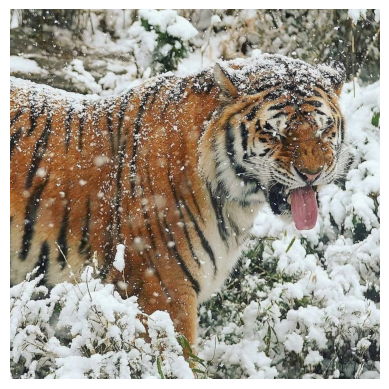

In [ ]:
# Открытие и отображение загруженного изображения для наглядности и удобства
image = Image.open(list(uploaded.keys())[0]).convert("RGB")
plt.imshow(image)
plt.axis("off")


In [ ]:
# Текстовые описания возможных животных
# Используются для zero-shot классификации изображения

labels = [
    "a photo of an Amur tiger",
    "a photo of a Bengal tiger",
    "a photo of a lion",
    "a photo of a leopard",
    "a photo of a domestic cat",
    "a photo without a tiger"
]



In [ ]:
# В данном блоке происходит входных данных для модели, а именно изображение + текстовые описания

inputs = processor(
    text=labels,
    images=image,
    return_tensors="pt",
    padding=True
)

# Перемещение данных на выбранное устройство (CPU или GPU)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)


probs = outputs.logits_per_image.softmax(dim=1)[0]


In [ ]:
# Запуск модели без вычисления градиентов
# Это ускоряет работу и снижает потребление памяти
for label, prob in sorted(zip(labels, probs), key=lambda x: x[1], reverse=True):
    print(f"{label}: {prob.item():.3f}")


a photo of an Amur tiger: 0.814
a photo of a Bengal tiger: 0.171
a photo without a tiger: 0.015
a photo of a lion: 0.000
a photo of a leopard: 0.000
a photo of a domestic cat: 0.000


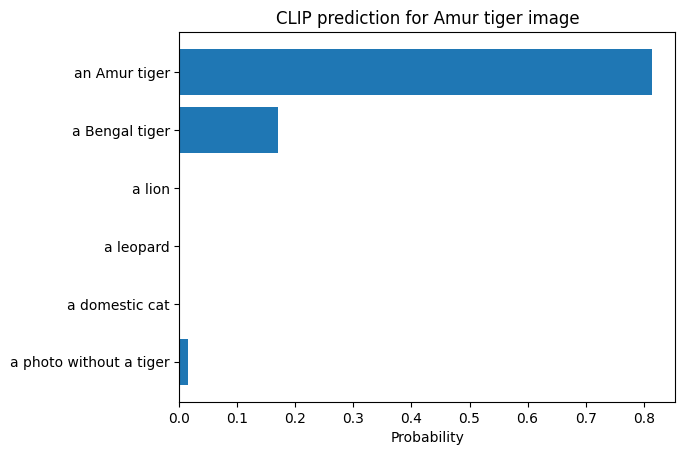

In [ ]:
# Вывод вероятностей для каждого класса
# Классы сортируются по убыванию вероятности

labels_short = [l.replace("a photo of ", "") for l in labels]
values = probs.cpu().numpy()

plt.barh(labels_short, values)
plt.xlabel("Probability")
plt.title("CLIP prediction for Amur tiger image")
plt.gca().invert_yaxis()
plt.show()
